**Entregable 1 - Cats and Dogs**

In [1]:
#Importo distintas librerias a utilizar
import pandas as pd
import numpy as np

from google.colab import drive

import glob as gb
import cv2

import sys
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization, GlobalMaxPool2D
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import zipfile
import os

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ReduceLROnPlateau




In [2]:
#Me conecto a drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Cargo el archivo y descomprimo las imagenes para entrenar y testear el modelo
imagenes = '/content/drive/MyDrive/CatsAndDogs.zip'
directorio = '/content/CatsAndDogs/'
with zipfile.ZipFile(imagenes, 'r') as zipf:
    zipf.extractall(directorio)

In [4]:
directorio_train = '/content/CatsAndDogs/train'
files = os.listdir(directorio_train)

#Verifico que las imagenes hayan cargado
print(f"Hay {len(files)} imagenes")

Hay 25000 imagenes


In [5]:
# Establezco el tamaño de las imagenes, segun lo visto en clase
size = 180

# Creo listas vacías de imágenes, títulos y etiquetas
X = []
Y = []
Title = []

#Normalizo las imagenes
files = gb.glob(pathname=str(directorio_train + '/*.jpg'))
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (size,size))
    X.append(list(image_array))
    file = file.split('/')[-1]
    sep = file.split('.')[0]
    Title.append(sep)
    if(sep=='dog'):
      Y.append(1)
    else:
      Y.append(0)

In [6]:
# Convierto las listas en array

X = np.array(X)
Y = np.array(Y)

In [7]:
#Estudio las dimensiones de las imagenes
X.shape

(25000, 180, 180, 3)

In [8]:
# Divido los datos en train y test

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

# Hago shuffle para que no queden todas las imagenes de una especie juntas de un mismo lado
X_train, Y_train=shuffle(X_train, Y_train, random_state=True)

# Aplico one-hot encoding
Y_train = tf.one_hot(Y_train, 2)
Y_test = tf. one_hot(Y_test, 2)

In [9]:
#Hago el modelo CNN

model = Sequential()

#Capas

model.add(Conv2D(32, kernel_size =(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(GlobalMaxPool2D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida con dos neuronas, pues son 2 categorias
model.add(Dense(units = 2, activation = 'softmax')),

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 524,994 (2.00 MB)

 Trainable params: 523,010 (2.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

None


In [10]:
#Callback

early_stopping = EarlyStopping(patience=10)

lr_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            initial_learning_rate=0.0001,
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.25,
                                            min_lr = 0.00001)

cb_list = [early_stopping,lr_reduction ]

In [11]:
# Entreno el modelo

epochs = 50

modelo = model.fit(X_train, Y_train, epochs = epochs, batch_size = 32, verbose = 1,
                   callbacks = cb_list, validation_data = (X_test, Y_test))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.5725 - loss: 0.8039 - val_accuracy: 0.6894 - val_loss: 0.6095 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7062 - loss: 0.5777 - val_accuracy: 0.6662 - val_loss: 0.5827 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7743 - loss: 0.4731 - val_accuracy: 0.8044 - val_loss: 0.4454 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8189 - loss: 0.4015 - val_accuracy: 0.8502 - val_loss: 0.3461 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8462 - loss: 0.3432 - val_accuracy: 0.8728 - val_loss: 0.2997 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8716 - loss: 0.2957 - val_accuracy: 0.8962 - val_loss: 0.2649 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8856 - l

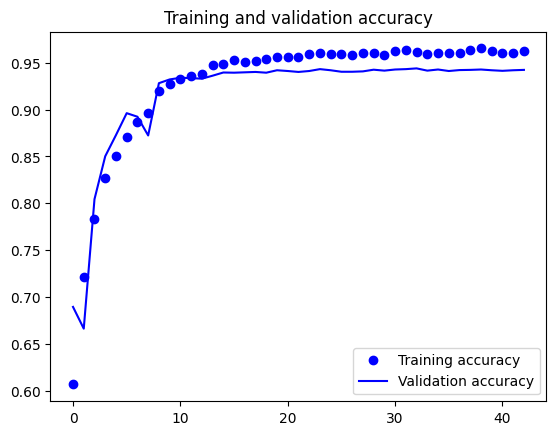

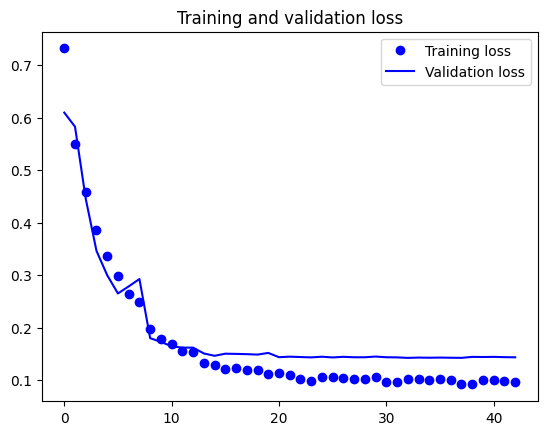

In [12]:
# Realizo graficas para evaluar accuracy y loss

%matplotlib inline
accuracy = modelo.history['accuracy']
val_accuracy = modelo.history['val_accuracy']
loss = modelo.history['loss']
val_loss = modelo.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
# Uso el modelo para predecir
prediccion = model.predict(X_test)
print('Prediction Shape is {}'.format(prediccion.shape))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Prediction Shape is (5000, 2)


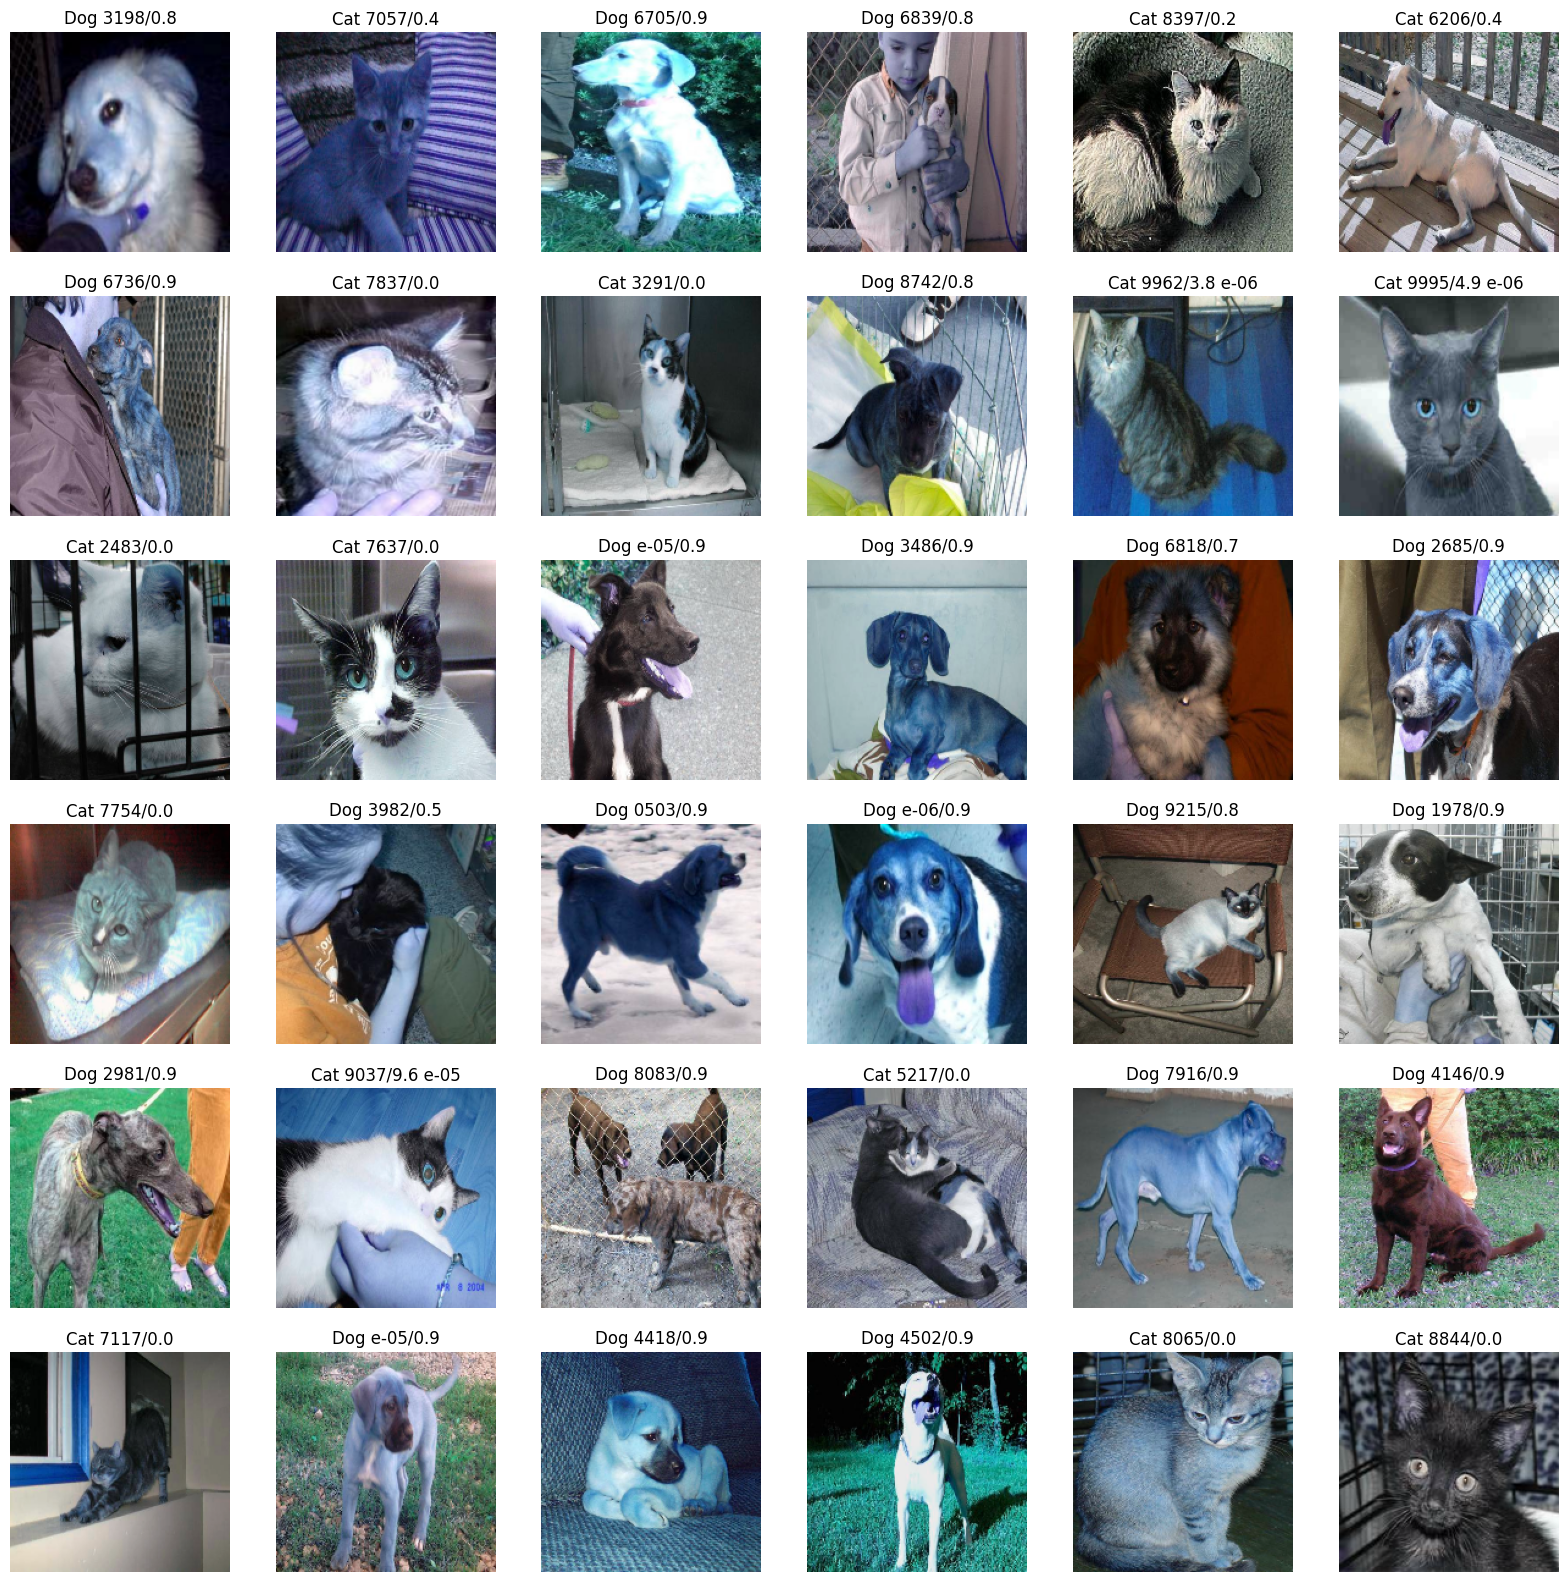

In [15]:
# Comparo la prediccion y la imagen

def get_code(n):
    if n == 1:
        return 'Dog'
    else:
        return 'Cat'

plt.figure(figsize=(20, 20))

for n , i in enumerate(list(np.random.randint(0, len(X_test), 36))):

    plt.subplot(6, 6, n+1)
    plt.imshow(keras.preprocessing.image.array_to_img(X_test[i]))
    plt.axis('off')
    tcat = str(prediccion[i][0])[-4:]
    tdog = str(prediccion[i][1])[:3]
    if 'e' in str(prediccion[i][1]):
        tdog += ' '+str(prediccion[i][1])[-4:]

    # Prediccion y su probabilidad
    clase_predicha = get_code(np.argmax(prediccion[i]))
    plt.title(f'{clase_predicha} {tcat}/{tdog}')